#### 생선분류 문제
##### 도미와 빙어 분류하기
##### 독립변수 : 임의 특성을 가지는 데이터들
##### 종속변수 : 임의 특성에 대한 정답을 가지는 데이터
##### 변수  : 특성(컬럼, 항목, 피쳐, 특성 모두 같은 의미)
            : 머신러닝에서는 특성 또는 항목이라고 함
            : 딥러닝에서는 피처라고 함
            : 데이터분석에서는 컬럼, 변수라고 함
#### 훈련(학습)을 시키는 시점을 기준으로 ....
        : 지도학습 - 종속변수(정답)을 알려주고 학습을 시키는 방법
        : 비지도학습 - 종속변수(정답)을 알려주지 않고 학습을 시키는 방법

### 머신러닝 순서
##### - 데이터 수집(전처리기 등이 완료)
##### - 데이터 분리(훈련/학습데이터 vs 테스트 데이터) , (훈련/학습데이터 vs 검증데이터 vs 테스트 데이터) 
##### - 데이터 비율 : [ 훈련(70%) 테스트(30%) ] /  [ 훈련(60%) 검증(20%) 테스트(20%) ]
##### - 데이터 훈련(학습) : fit()함수
##### - 데이터 검증 : 훈련시 사용 - 훈련에 대한 1차 테스트
##### - 데이터 테스트 : predict()함수 - 훈련에 대한 최종 테스트

In [169]:
domi_len = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 
                30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 
                33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 
                39.5, 41.0, 41.0]
domi_wgt = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 
                390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 
                600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 
                685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 
                850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
bing_len = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
bing_wgt = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [87]:
len(domi_len), len(bing_len)

(35, 14)

In [4]:
print(domi_len)
print(domi_wgt)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]


In [5]:
# 머신럼닝에서는 데이터의 분포 확인이 필요함
# 선형인지 비선형인지 확인 후 진행
# 분포 확인은 산점도 시각화를 이용
#  x축 : 길이 y축 : 무게

In [6]:
import matplotlib.pyplot as plt

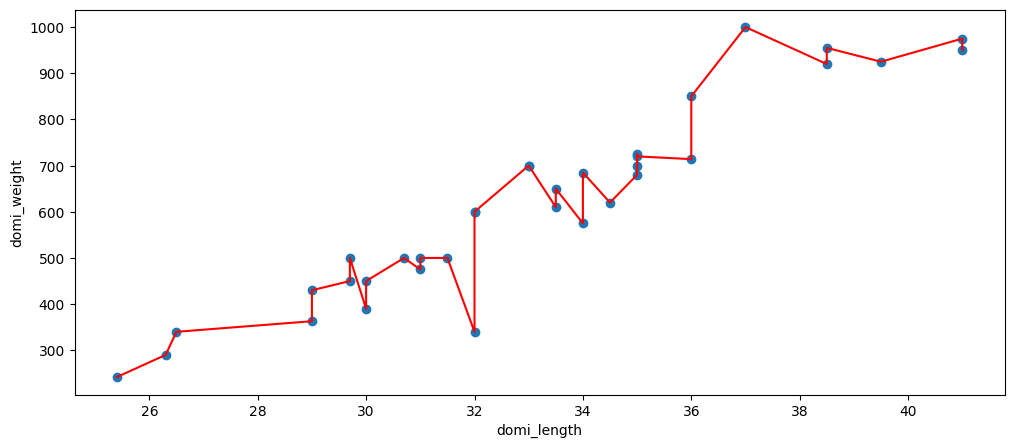

In [13]:
plt.figure(figsize = (12,5))
plt.scatter(domi_len, domi_wgt)
plt.plot(domi_len, domi_wgt, color='red')
# plt.bar(domi_len, domi_wgt, color='gray')
plt.xlabel('domi_length')
plt.ylabel('domi_weight')
plt.show()
# 해석 
# - 도미 35마리를 x축과 y축으로 하는 2차원 산점도 그래프
# - 도미의 길이가 길수록 무게가 커지는 분포를 보임(우상향 븐포)
# - 산점도 흐름이 직선에 가까운 분포를 보이는 경우 선형(linear)라고 칭함
# - 길이와 무게는 선형관계를 나타냄(패턴이 보임)

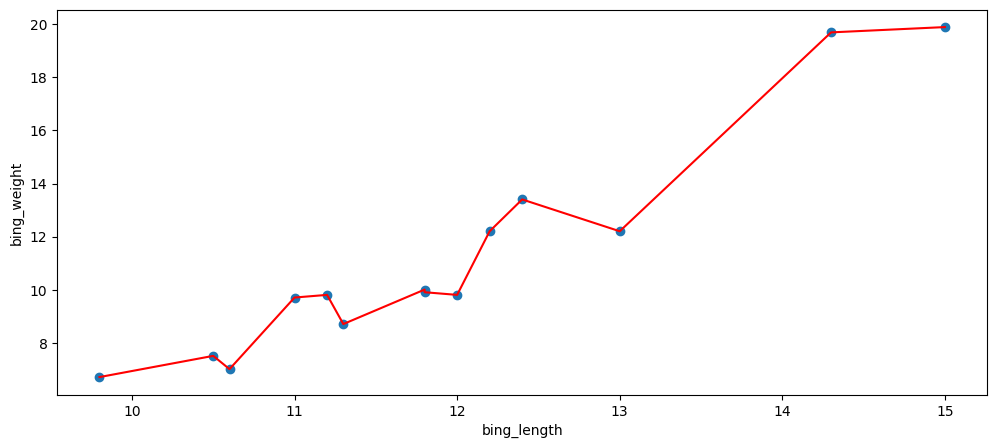

In [14]:
plt.figure(figsize = (12,5))
plt.scatter(bing_len, bing_wgt)
plt.plot(bing_len, bing_wgt, color='red')
# plt.bar(domi_len, domi_wgt, color='gray')
plt.xlabel('bing_length')
plt.ylabel('bing_weight')
plt.show()
# 해석 
# - 빙어 14마리를 x축과 y축으로 하는 2차원 산점도 그래프
# - 빙어도 길이가 길수록 무게가 커지는 분포를 보임(우상향 븐포)
# - 산점도 흐름이 직선에 가까운 분포를 보이는 경우 선형(linear)라고 칭함
# - 좌하단의 분포는 약간 곡선을 보임
# - 길이와 무게는 선형관계를 나타냄(패턴이 보임)

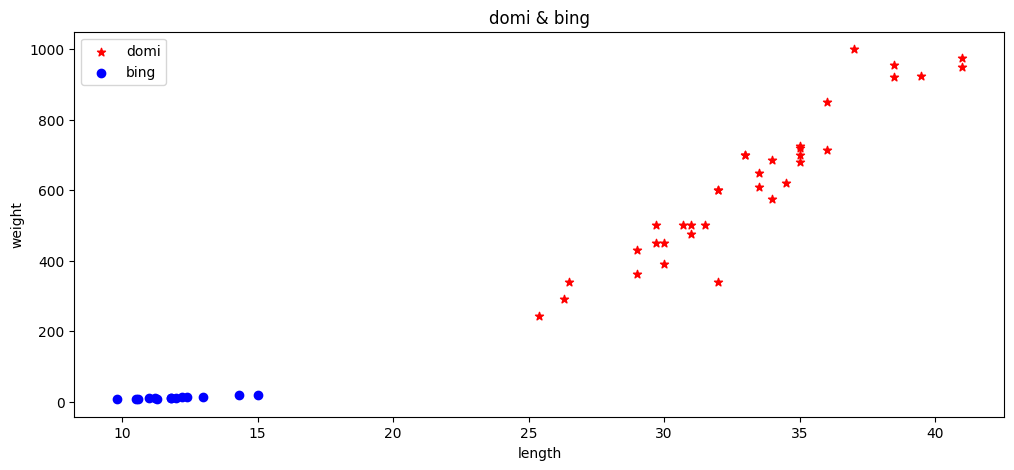

In [21]:
# 도미와 빙어 데이터 각각의 분포로는 시각적 분류가 안됨
#  - 동시에 비교하기 위해서 두개의 산점도를 하나로 시각화하기
plt.figure(figsize = (12,5))
plt.scatter(domi_len, domi_wgt, marker='*', color='red', label='domi')
plt.scatter(bing_len, bing_wgt, marker='o', color='blue', label='bing')
plt.legend()
plt.xlabel('length')
plt.ylabel('weight')
plt.title('domi & bing')
plt.show()


In [88]:
# 훈련을 위해서 도미와 빙어데이터를 하나로 합치기
# domi_len
# domi_wgt
# bing_len
# bing_wgt
length =[]
# length = domi_len
# length.extend(bing_len)
length = domi_len + bing_len
weight = domi_wgt + bing_wgt
print(length)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [89]:
len(length)

49

In [70]:
# 머신러닝 훈련을 하기 위해서는 데이터를 2차원으로 변환해줘야 함
# [[길이, 무게],[길이,무게],...]
# [길이,무게] 한 셋트가 행이 된다
#  길이와 무게 각각은 열이 된다

# 2차원 데이터셋 변수 : fish_data

fish_data = []
for x,y in zip (length,weigth):
    fish_data.append([x,y])

# 또는 fish_data = [[x,y] for x,y in zip (length,weigth)]

In [90]:
len(fish_data)

49

In [91]:
# 길이와 무게 데이터를 이용헤 도미와 빙어를 구분하는 규칙을 찾아내기 위해
# 지도학습기반으로 진행 : 정답생성
# 둘중에 하나를 찾는 분류 : 이진분류
# 이진분류에 사용되는 데이터 값의 형태 0 또는 1
# 찾고자 하는 값을 주로 1로 정하며 이와 값은 0으로 처리
# 종속변수는 1차원으로 만듦

In [ ]:
# 종속변수 만들기(특성변수를 만등다고 보면됨)
# 도미를 찾는다고 가정할 때 도미의 종속변수는 1
# 빙어는 0으로 종속변수를 생성
# 변수명은 보통 target이라는 명칭을 사용함
# 우리가 사용할 종속변수명은 fish_target

In [108]:
fish_target = [] 
fish_target = [1] * 35 + [0] * 14

In [109]:
len(fish_target)

49

In [110]:
# 종속변수 : fish_target
print(fish_target)
# 독립변수 : fish_data
print(fish_data)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 훈련시키기

In [111]:
# 사용할 머신러닝 패키지 불러들이기
#  classifier : 분류모델(클래스)
from sklearn.neighbors import KNeighborsClassifier as KNN

In [112]:
# 클래스 객체 생성하기
# 보통 클래스를 모델이라고 칭함
# KNN(K 최근접 이웃 분류 클래스)
# 내부적으로는 k최근접이웃분류 알고리즘을 사용함
# 알고리즘 : 이웃의 갯수중에 주어진 특성이 어디어 더 가까운지를 이웃들의 비율을 이용해 정함
# 비교할 이웃의 갯수 설정 : 기본값은 5이며, 홀수로 지정
knn = KNN()
knn

KNeighborsClassifier()

In [118]:
# 훈련시키기
# 훈련을 시키기 위한 함수 : fit()
# fit(독립변수, 종속변수)
knn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [123]:
# 학습능력 확인하기
# 학습능력 보기 : score
# 결과값 : 구분을 얼마나 잘 할 수 있는지에 대한 기준이 됨
# score()에 상요하는 데이터는 검증 또는 테스트 데이터를 사용하게 됨
# score()의 결과값을 정확도(accuracy)라고 칭함
# 정확도 계산 : 훈련중 맞춘 정답갯수 / 전체 갯수
# 정확도 해석 : 1에 가끼울수록 정확도가 높고 0에 가까울수록 정확도가 낮음
# 정확도는 1이 나오면 안됨(과대적합이라고 함 - 너무 잘 맞춤 - 테스트 정확도가 낮을 경우)
# 훈련 모델을 사용할 수 있냐 없냐는 1보다 작으며 0.9~0.99의 정확도를 보일때 좋은 모델이라고 함
# 다만 훈려모델에 사용된 데이터를 이용한 기존 장확도가 있다면
# 그보다 높으면 좋은 모델이라고 평가할 수 있음
knn.score(fish_data, fish_target)

1.0

### 임의 데이터 넣기

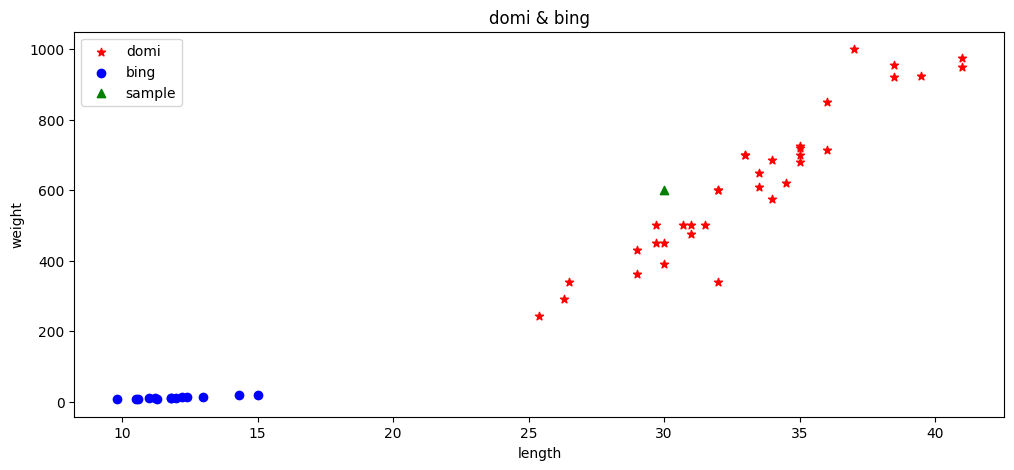

In [124]:
plt.figure(figsize = (12,5))
plt.scatter(domi_len, domi_wgt, marker='*', color='red', label='domi')
plt.scatter(bing_len, bing_wgt, marker='o', color='blue', label='bing')

# 임의 데이터 추가하기
plt.scatter(30, 600, marker='^', color='green', label='sample')
plt.legend()

plt.xlabel('length')
plt.ylabel('weight')
plt.title('domi & bing')
plt.show()

### sample데이터 예측하기

In [126]:
# 예측에 사용하는 함수 : predict()
# 예측엥 사용되는 데이터는 보통 테스트 데이터 사용
# 임의 데이터 : 테스트 데이터
# 예측을 할 때는 종속변수를 넣지 않고 독립변수만 넣어줌
knn.predict([[30,600]])

array([1])

In [127]:
# 메모리에 있는 훈련한 독립변수 데이터
knn._fit_X

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [129]:
# 메모리에 있는 훈련한 종속변수 데이터
knn._y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

#### 이웃의 갯수 지정하기(전체데이터건수 만큼 이웃수를 만들수 있음)


In [207]:
# 가장 가까운 이웃의 갯수 중에 어느쪽에 분포가 더 많은지를 확인하여 많은쪽의 종속변수를 따름
# n_neighbors=20 비교하는 이웃의 수, 기본값은 5, 전체데이터건수 만큼 이웃수를 만들수 있음
# 하이퍼파라미터 : 사람이 직접 속성값을 지정해 주는 변수들, 훈련에 영향을 미치는 속성
# 하이퍼파라미터의 값에 따라서 훈련 정확도에 영향을 미침
knn1 = KNN(n_neighbors=25)
knn1

KNeighborsClassifier(n_neighbors=25)

In [208]:
# 훈련하기
knn1.fit(fish_data, fish_target)

KNeighborsClassifier(n_neighbors=25)

In [209]:
# 정확도 확인하기
knn1.score(fish_data, fish_target)

0.9795918367346939

In [210]:
# 예측하기
knn1.predict([[50,300]])

array([1])

In [211]:
# 예측하기 확률값
# knn1.predict_proba(fish_data)
knn1.predict_proba([[50,300]])

array([[0.4, 0.6]])

In [212]:
knn1.predict_proba(fish_data)

array([[0.56, 0.44],
       [0.44, 0.56],
       [0.2 , 0.8 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.2 , 0.8 ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56, 0.44],
       [0.56,

### 이웃의 수 최적화하기

In [192]:
# 모델 생성이후 이웃의 수를 최적화하기
# 정확도를 확인하는 방법
knn1.n_neighbors = 1  # 학습한 모델의 이웃의 수를 조정해서 정확도 확인
knn1.score(fish_data, fish_target)

1.0

In [225]:
# 이웃의 수가 19라 가장 적합함
kn = 0
for i in range(1,len(fish_target),2):
    knn1.n_neighbors = i
    score = knn1.score(fish_data, fish_target)
    if score < 1:
        print(i, ':', score)
        kn = i
        break

19 : 0.9795918367346939


### score() : 내부적으로 fit()이 수행되면서 정확도 계산을 수행
####  모델의 하이퍼파라미터 갑시 변경이 안되면 변경안된 것으로 훈련
#### 변경되면 변경된 값으로 훈련하면서 정확도를 계산함
#### 내부적으로는 훈련을 시키기 때문에 일반적으로 테스트 데이터는
#### 정확도에 사용되지 않고 검증 데이터를 사용함
#### 테스트 데이터를 사용할 경우 훈련에 집중된 결과를 얻을수 있음

#### fit(훈련데이터)
#### score(검증데이터)
#### predict(학습데이터)

In [218]:
# 하이퍼파라미터 값을 이용해 최적의 알고리즘 생성
knn_end = KNN(n_neighbors = kn)
knn_end.fit(fish_data, fish_target)
knn_end.score(fish_data, fish_target)

0.9795918367346939